# 💟 Lovely NumPy

> After all, you are only human.

## [Read full docs](https://xl0.github.io/lovely-numpy) | ❤️ [Lovely Tensors](https://github.com/xl0/lovely-tensors) | ❤️‍🔥 [ Lovely `JAX`](https://github.com/xl0/lovely-jax) |

## Install

```sh
pip install lovely-numpy
```

## How to use

In [ ]:
# |hide
import numpy as np
from PIL import Image
from fastcore.test import test_eq

In [ ]:
# |hide
np.set_printoptions(precision=4)
numbers = np.load("mysteryman.npy")

How often do you find yourself debugging NumPy code? You dump a tensor to the cell output, and see this:

In [ ]:
numbers 

array([[[-0.3541, -0.3369, -0.4054, ..., -0.5596, -0.4739,  2.2489],
        [-0.4054, -0.4226, -0.4911, ..., -0.9192, -0.8507,  2.1633],
        [-0.4739, -0.4739, -0.5424, ..., -1.039 , -1.039 ,  2.1975],
        ...,
        [-0.902 , -0.8335, -0.9363, ..., -1.4672, -1.2959,  2.2318],
        [-0.8507, -0.7822, -0.9363, ..., -1.6042, -1.5014,  2.1804],
        [-0.8335, -0.8164, -0.9705, ..., -1.6555, -1.5528,  2.1119]],

       [[-0.1975, -0.1975, -0.3025, ..., -0.4776, -0.3725,  2.4111],
        [-0.25  , -0.2325, -0.3375, ..., -0.7052, -0.6702,  2.3585],
        [-0.3025, -0.285 , -0.3901, ..., -0.7402, -0.8102,  2.3761],
        ...,
        [-0.4251, -0.2325, -0.3725, ..., -1.0903, -1.0203,  2.4286],
        [-0.3901, -0.2325, -0.4251, ..., -1.2304, -1.2304,  2.4111],
        [-0.4076, -0.285 , -0.4776, ..., -1.2829, -1.2829,  2.341 ]],

       [[-0.6715, -0.9853, -0.8807, ..., -0.9678, -0.689 ,  2.396 ],
        [-0.7238, -1.0724, -0.9678, ..., -1.2467, -1.0201,  2.3263],
    

Was it really useful for you, as a human, to see all these numbers?

What is the shape? The size?\
What are the statistics?\
Are any of the values `nan` or `inf`?\
Is it an image of a man holding a tench?

In [ ]:
from lovely_numpy import lovely, rgb

## `lovely()`

In [ ]:
lovely(numbers)

ndarray[3, 196, 196] f32 n=115248 x∈[-2.118, 2.640] μ=-0.388 σ=1.073

Better, huh?

In [ ]:
lovely(numbers[1,:6,1]) # Still shows values if there are not too many.

ndarray[6] f32 x∈[-0.443, -0.197] μ=-0.311 σ=0.083 [-0.197, -0.232, -0.285, -0.373, -0.443, -0.338]

In [ ]:
spicy = numbers[0,:12,0].copy()

spicy[0] *= 10000
spicy[1] /= 10000
spicy[2] = float('inf')
spicy[3] = float('-inf')
spicy[4] = float('nan')

spicy = spicy.reshape((2,6))
lovely(spicy) # Spicy stuff

ndarray[2, 6] f32 n=12 x∈[-3.541e+03, -4.054e-05] μ=-393.842 σ=1.113e+03 +Inf! -Inf! NaN!

In [ ]:
lovely(np.zeros((10, 10))) # A zero array - make it obvious

ndarray[10, 10] all_zeros

In [ ]:
lovely(spicy, verbose=True)

ndarray[2, 6] f32 n=12 x∈[-3.541e+03, -4.054e-05] μ=-393.842 σ=1.113e+03 +Inf! -Inf! NaN!
array([[-3.5405e+03, -4.0543e-05,         inf,        -inf,         nan,
        -6.1093e-01],
       [-6.1093e-01, -5.9380e-01, -5.9380e-01, -5.4243e-01, -5.4243e-01,
        -5.4243e-01]], dtype=float32)

## Going `.deeper`

In [ ]:
lovely(numbers, depth=1)

ndarray[3, 196, 196] f32 n=115248 x∈[-2.118, 2.640] μ=-0.388 σ=1.073
  ndarray[196, 196] f32 n=38416 x∈[-2.118, 2.249] μ=-0.324 σ=1.036
  ndarray[196, 196] f32 n=38416 x∈[-1.966, 2.429] μ=-0.274 σ=0.973
  ndarray[196, 196] f32 n=38416 x∈[-1.804, 2.640] μ=-0.567 σ=1.178

In [ ]:
# You can go deeper if you need to
lovely(numbers[:,:3,:5], depth=2)

ndarray[3, 3, 5] f32 n=45 x∈[-1.316, -0.197] μ=-0.593 σ=0.302
  ndarray[3, 5] f32 n=15 x∈[-0.765, -0.337] μ=-0.492 σ=0.119
    ndarray[5] f32 x∈[-0.440, -0.337] μ=-0.385 σ=0.037 [-0.354, -0.337, -0.405, -0.440, -0.388]
    ndarray[5] f32 x∈[-0.662, -0.405] μ=-0.512 σ=0.097 [-0.405, -0.423, -0.491, -0.577, -0.662]
    ndarray[5] f32 x∈[-0.765, -0.474] μ=-0.580 σ=0.112 [-0.474, -0.474, -0.542, -0.645, -0.765]
  ndarray[3, 5] f32 n=15 x∈[-0.513, -0.197] μ=-0.321 σ=0.096
    ndarray[5] f32 x∈[-0.303, -0.197] μ=-0.243 σ=0.049 [-0.197, -0.197, -0.303, -0.303, -0.215]
    ndarray[5] f32 x∈[-0.408, -0.232] μ=-0.327 σ=0.075 [-0.250, -0.232, -0.338, -0.408, -0.408]
    ndarray[5] f32 x∈[-0.513, -0.285] μ=-0.394 σ=0.091 [-0.303, -0.285, -0.390, -0.478, -0.513]
  ndarray[3, 5] f32 n=15 x∈[-1.316, -0.672] μ=-0.964 σ=0.170
    ndarray[5] f32 x∈[-0.985, -0.672] μ=-0.846 σ=0.110 [-0.672, -0.985, -0.881, -0.776, -0.916]
    ndarray[5] f32 x∈[-1.212, -0.724] μ=-0.989 σ=0.160 [-0.724, -1.072, -0.968, -0.

## Now in `.rgb` color

The important queston - is it our man?

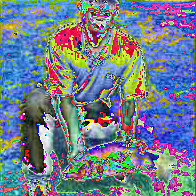

In [ ]:
rgb(numbers, cl=0)

_Maaaaybe?_ Looks like someone normalized him.

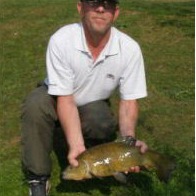

In [ ]:
in_stats = ( (0.485, 0.456, 0.406),     # mean 
             (0.229, 0.224, 0.225) )    # std

# numbers.rgb(in_stats, cl=True) # For channel-last input format
rgb(numbers, denorm=in_stats, cl=0)

It's indeed our hero, the Tenchman!